#### 1. Data Exploration
We start by loading the dataset.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file = 'global_sales.csv'
df = pd.read_csv(file)

Then we check the shape of the dataset and the first few rows to understand its structure. From there, we will identify any issues like missing values or duplicates.

We will notice that that `STATE` column has 1484 missing values, and `POSTALCODE` column has 76 missing values.

In [72]:
# Shape of the dataset
df.shape

# Column names and types
df.info()

# First few rows
print(df.head())

# Check for nulls
print(df.isnull().sum())

# Check for duplicates
print(f"No of duplicates: {df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   PRICEEACH        2823 non-null   float64
 3   ORDERLINENUMBER  2823 non-null   int64  
 4   SALES            2823 non-null   float64
 5   ORDERDATE        2823 non-null   object 
 6   STATUS           2823 non-null   object 
 7   QTR_ID           2823 non-null   int64  
 8   MONTH_ID         2823 non-null   int64  
 9   YEAR_ID          2823 non-null   int64  
 10  PRODUCTLINE      2823 non-null   object 
 11  MSRP             2823 non-null   int64  
 12  PRODUCTCODE      2823 non-null   object 
 13  CUSTOMERNAME     2823 non-null   object 
 14  CITY             2823 non-null   object 
 15  STATE            1337 non-null   object 
 16  POSTALCODE       2747 non-null   object 
 17  COUNTRY       

##### 2. Data Cleaning

Let's start by converting the 'ORDERDATE' column to a datetime object. This will help us in time series analysis later on.

In [90]:
# Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], format='%m/%d/%Y %H:%M')

# Check the data types again
df.info()

# Check head of the dataframe
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2823 non-null   int64         
 1   QUANTITYORDERED  2823 non-null   int64         
 2   PRICEEACH        2823 non-null   float64       
 3   ORDERLINENUMBER  2823 non-null   int64         
 4   SALES            2823 non-null   float64       
 5   ORDERDATE        2823 non-null   datetime64[ns]
 6   STATUS           2823 non-null   object        
 7   QTR_ID           2823 non-null   int64         
 8   MONTH_ID         2823 non-null   int64         
 9   YEAR_ID          2823 non-null   int64         
 10  PRODUCTLINE      2823 non-null   object        
 11  MSRP             2823 non-null   int64         
 12  PRODUCTCODE      2823 non-null   object        
 13  CUSTOMERNAME     2823 non-null   object        
 14  CITY             2823 non-null   object 

We noticed that around 50% of the data is missing in the `STATE` column from the previous analysis. We can drop this column as we will be focusing on doing a country-level analysis.

As for the 76 missing values of the `POSTALCODE` column, we can drop them as well since they are not significant compared to the size of the dataset.

But just to be safe, let's see what information are we losing by dropping the `STATE` column. Let's start by checking which countries have the highest sales.

In [65]:
# Group by COUNTRY and sum the SALES for each country
sales_by_country = df.groupby('COUNTRY')['SALES'].sum().reset_index()

# Sort the result by SALES in descending order
sales_by_country_sorted = sales_by_country.sort_values(by='SALES', ascending=False)

# Display the sorted result
sales_by_country_sorted.head()

,COUNTRY,SALES
18,USA,3627982.83
14,Spain,1215686.92
6,France,1110916.52
0,Australia,630623.10
17,UK,478880.46


Now let's check what are the countries of the missing values in the `state` column, and see if they are the same as the countries with the highest sales.

Number of records with null STATE: 1486

Total SALES and Contribution % by Country and City for null STATE:
         COUNTRY           CITY       SALES  SalesContributionPct
31        Spain         Madrid  1082551.44             89.048539
29    Singapore      Singapore   288488.41            100.000000
13       France          Paris   268944.68             24.209261
12       France         Nantes   204304.86             18.390658
38           UK     Manchester   157807.81             39.388968
1       Austria       Salzburg   149798.63             74.134789
5       Denmark      Kobenhavn   145041.60             59.047094
10       France           Lyon   142874.25             12.860935
23        Italy  Reggio Emilia   142601.33             38.060077
22        Italy        Bergamo   137955.72             36.820171
14       France          Reims   135042.94             12.155994
33       Sweden          Boras   134259.33             63.928688
37           UK         London   124823.54    

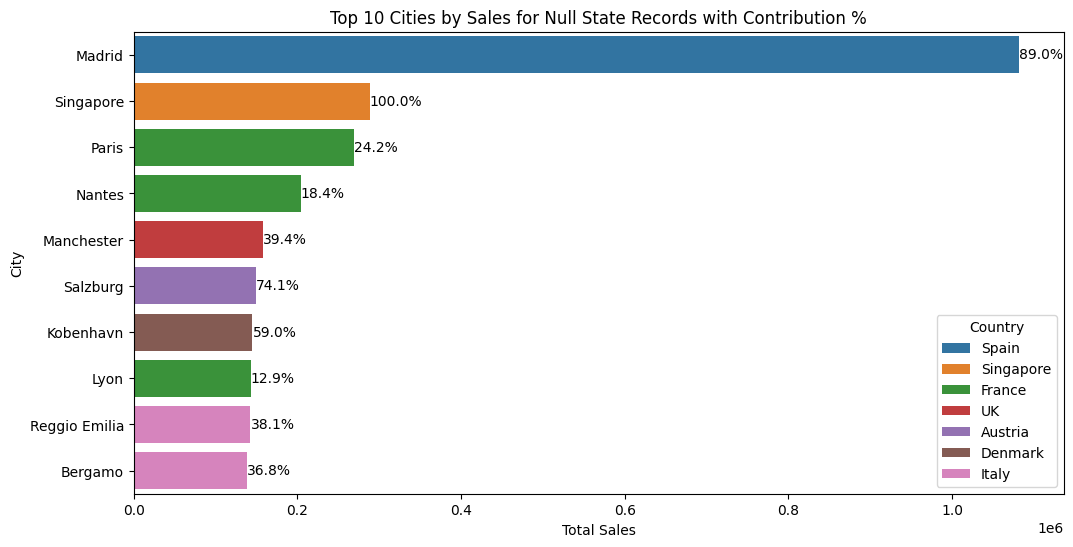

In [ ]:
# Filter records where STATE is null
null_state_df = df[df['STATE'].isnull()]

# Check if there are any records with null STATE
if not null_state_df.empty:
    print("Number of records with null STATE:", len(null_state_df))
    
    # Group by COUNTRY and CITY to calculate total SALES
    sales_by_country_city = null_state_df.groupby(['COUNTRY', 'CITY'])['SALES'].sum().reset_index()
    
    # Calculate total SALES per COUNTRY for null STATE records
    country_totals = null_state_df.groupby('COUNTRY')['SALES'].sum().reset_index()
    country_totals = country_totals.rename(columns={'SALES': 'CountryTotalSales'})
    
    # Merge to get CountryTotalSales for each CITY
    sales_by_country_city = sales_by_country_city.merge(country_totals, on='COUNTRY')
    
    # Calculate percentage contribution of each CITY to its COUNTRY
    sales_by_country_city['SalesContributionPct'] = (sales_by_country_city['SALES'] / sales_by_country_city['CountryTotalSales']) * 100
    
    # Sort by SALES descending
    sales_by_country_city = sales_by_country_city.sort_values(by='SALES', ascending=False)
    
    # Print results
    print("\nTotal SALES and Contribution % by Country and City for null STATE:\n", sales_by_country_city[['COUNTRY', 'CITY', 'SALES', 'SalesContributionPct']])
    
    # Visualize top 10 COUNTRY-CITY pairs by SALES
    top_sales = sales_by_country_city.head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_sales, x='SALES', y='CITY', hue='COUNTRY', dodge=False)
    
    # Add percentage labels on the bars
    for i, row in enumerate(top_sales.itertuples()):
        plt.text(row.SALES, i, f'{row.SalesContributionPct:.1f}%', va='center')
    
    plt.title('Top 10 Cities by Sales for Null State Records with Contribution %')
    plt.xlabel('Total Sales')
    plt.ylabel('City')
    plt.legend(title='Country')
    plt.show()
else:
    print("No records with null STATE found.")

Based on the analysis, we can see that there three countries from the top 5 highest sales countries have missing values in the `state` column. And the reason that they (Spain, France, and UK) are missing the state value is that the countries are not divided by states. So if we want to do any regional analysis for the countries that have missing state column, we can safely drop the `state` column and do a city analysis instead.

##### 3. Analysis and Visualization

Now that we have cleaned the data, we can start our analysis.

1. Highest sales by customer name

In [76]:
# Group by CUSTOMERNAME and COUNTRY and sum the SALES
sales_by_customer_country = df.groupby(['CUSTOMERNAME', 'COUNTRY'])['SALES'].sum().reset_index()

# Sort the sales_by_customer_country DataFrame by SALES in descending order
sales_by_customer_country_sorted = sales_by_customer_country.sort_values(by='SALES', ascending=False)

# Display the sorted result
sales_by_customer_country_sorted

,CUSTOMERNAME,COUNTRY,SALES
33,Euro Shopping Channel,Spain,912294.11
55,Mini Gifts Distributors Ltd.,USA,654858.06
6,"Australian Collectors, Co.",Australia,200995.41
58,Muscle Machine Inc,USA,197736.94
44,La Rochelle Gifts,France,180124.90
...,...,...,...
69,Royale Belge,Belgium,33440.10
50,Microscale Inc.,USA,33144.93
10,Auto-Moto Classics Inc.,USA,26479.26
4,Atelier graphique,France,24179.96


2. Highest sales by deal sizes

DEALSIZE
Large     1302119.26
Medium    6087432.24
Small     2643077.35
Name: SALES, dtype: float64


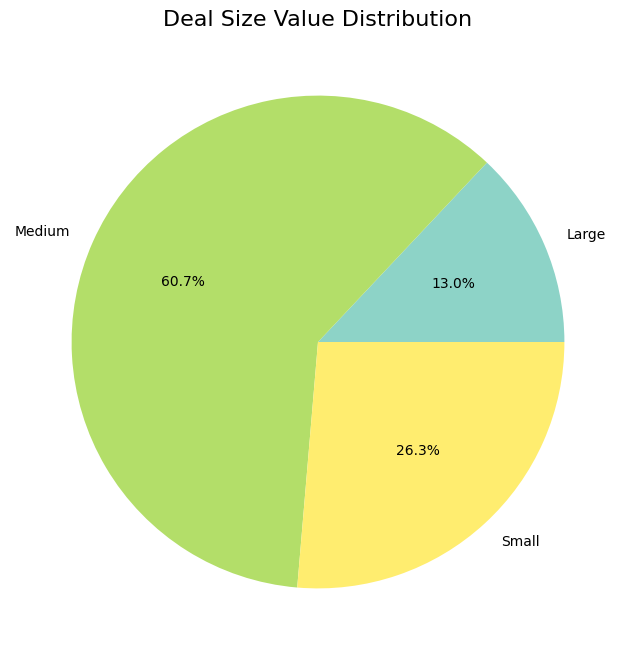

In [77]:
import matplotlib.pyplot as plt

# Sum of SALES by DEALSIZE
deal_size_value = df.groupby('DEALSIZE')['SALES'].sum()

# Display the result
print(deal_size_value)

# Plot the value of deal sizes as a pie chart
deal_size_value.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colormap='Set3')
plt.title('Deal Size Value Distribution', fontsize=16)
plt.ylabel('')  # Remove the y-label to make it cleaner
plt.show()



3. Time Series Analysis

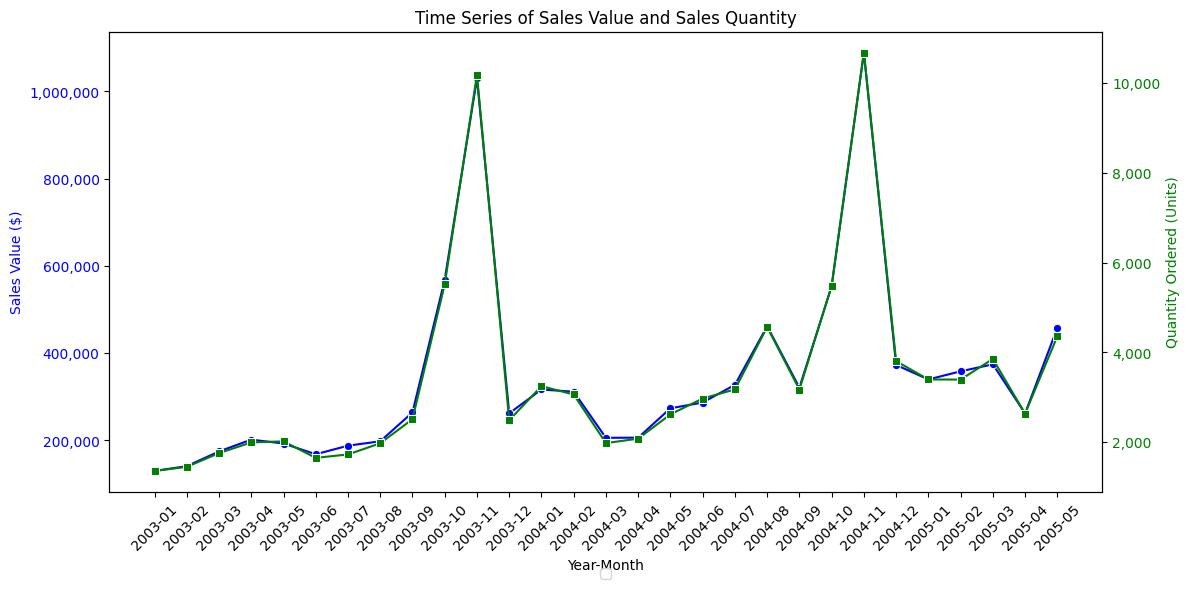


Time Series Data (Sales and Quantity Ordered by Month):
   YearMonth       SALES  QUANTITYORDERED
0    2003-01   129753.60             1357
1    2003-02   140836.19             1449
2    2003-03   174504.90             1755
3    2003-04   201609.55             1993
4    2003-05   192673.11             2017
5    2003-06   168082.56             1649
6    2003-07   187731.88             1725
7    2003-08   197809.30             1974
8    2003-09   263973.36             2510
9    2003-10   568290.97             5515
10   2003-11  1029837.66            10179
11   2003-12   261876.46             2489
12   2004-01   316577.42             3245
13   2004-02   311419.53             3061
14   2004-03   205733.73             1978
15   2004-04   206148.12             2077
16   2004-05   273438.39             2618
17   2004-06   286674.22             2971
18   2004-07   327144.09             3174
19   2004-08   461501.27             4564
20   2004-09   320750.91             3171
21   2004-10   5529

In [ ]:
# Aggregate SALES and QUANTITYORDERED by month
from matplotlib import ticker

# Aggregate SALES and QUANTITYORDERED by month
df['YearMonth'] = df['ORDERDATE'].dt.to_period('M').astype(str)
time_series_data = df.groupby('YearMonth').agg({
    'SALES': 'sum',
    'QUANTITYORDERED': 'sum'
}).reset_index()

# Create dual-axis time series chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot SALES on primary y-axis (left)
sns.lineplot(data=time_series_data, x='YearMonth', y='SALES', color='blue', marker='o', ax=ax1)
ax1.set_title('Time Series of Sales Value and Sales Quantity')
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Sales Value ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Show all months on x-axis
ax1.set_xticks(range(len(time_series_data)))
ax1.set_xticklabels(time_series_data['YearMonth'], rotation=45)
# Format y-axis to show full numbers
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Create secondary y-axis for QUANTITYORDERED (right)
ax2 = ax1.twinx()
sns.lineplot(data=time_series_data, x='YearMonth', y='QUANTITYORDERED', color='green', marker='s', ax=ax2)
ax2.set_ylabel('Quantity Ordered (Units)', color='green')
ax2.tick_params(axis='y', labelcolor='green')
# Format y-axis to show full numbers
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, ['Sales Value', 'Sales Quantity'], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()

# Print aggregated data
print("\nTime Series Data (Sales and Quantity Ordered by Month):")
print(time_series_data)

##### 4. Summary

1. The relationship between the order quantity and sales is linear, the order quantity increases 1, the sales also increase by 100. And the average sales per order quantity is around $100.
2. The company is making most of its sales from `Small` and `Medium` deal sizes, which is a good sign as it means that the company is able to close deals with smaller customers as well.
3. The company sales is the highest during the month of `November` because of Christmas and Black Friday sales.

